In [1]:
import datetime
import numpy as np
import gps_tec_plot

import matplotlib as mpl
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs

%matplotlib inline

In [2]:
sDate = datetime.datetime(2017,11,3)

In [3]:
tec_obj = gps_tec_plot.TecPlotter(sDate)

min(tecs) = 306.00018
max(tecs) = 306.99997


In [4]:
plotDate  = datetime.datetime(2017,11,3,13,43)
tecs_vals = tec_obj.get_tec_vals(plotDate,return_tec_values=True)

In [5]:
tecs_vals

{'pidx': array([51974912, 51974913, 51974914, ..., 52037062, 52037063, 52037064]),
 'pidx0': array([51968814, 51968815, 51968816, ..., 52030927, 52030928, 52030929]),
 'pidus': array([51968814, 51968815, 51968816, ..., 52030924, 52030927, 52030929]),
 'pidus_left': array([51968814, 51968815, 51968821, ..., 52030775, 52030908, 52030929]),
 'pidus_mid': array([51968826, 51968832, 51968833, ..., 52030907, 52030917, 52030924]),
 'pidus_right': array([51969012, 51969032, 51969062, ..., 52030865, 52030879, 52030918]),
 'tecs': array([[ 3.0600018e+02, -4.1031399e+01, -6.7282600e+01, -9.9600002e-02,
          1.3992000e+01,  9.9990002e+02],
        [ 3.0600018e+02, -3.8958000e+01, -6.6344803e+01, -5.0999999e-02,
          1.4416200e+01,  9.9990002e+02],
        [ 3.0600018e+02, -3.8958000e+01, -6.6344803e+01, -5.0999999e-02,
          1.4416200e+01,  9.9990002e+02],
        ...,
        [ 3.0699997e+02,  3.8276501e+01, -8.6363403e+01, -1.7580000e-01,
          6.8976002e+00,  9.9990002e+02],
 

In [8]:
keys = []
keys.append('pidx')
keys.append('pidx0')
keys.append('pidus')
keys.append('pidus_left')
keys.append('pidus_mid')
keys.append('pidus_right')

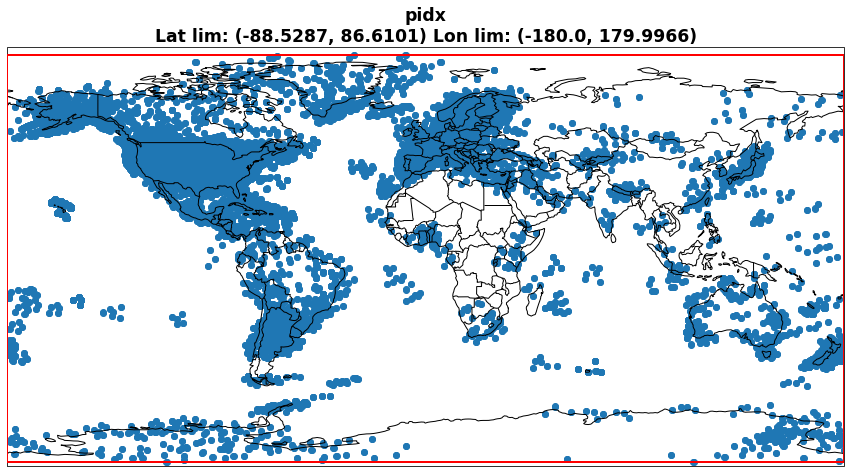

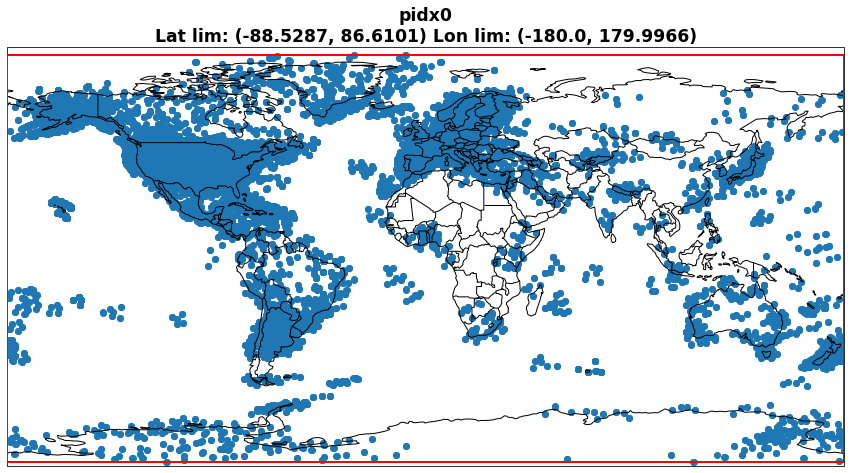

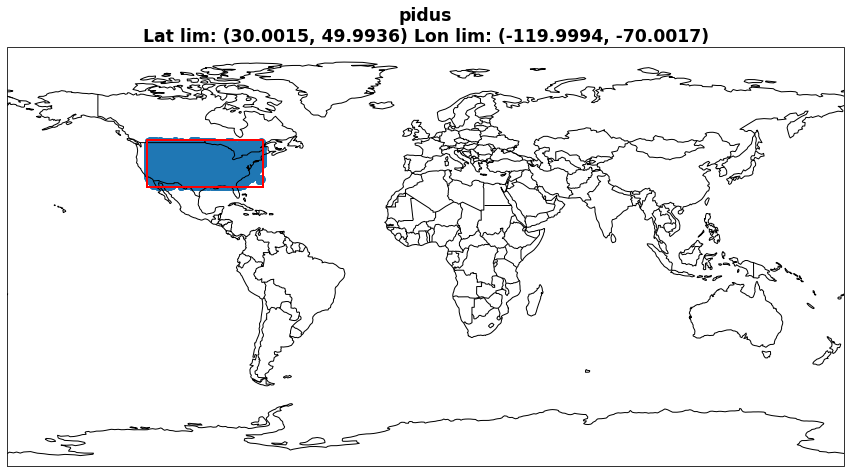

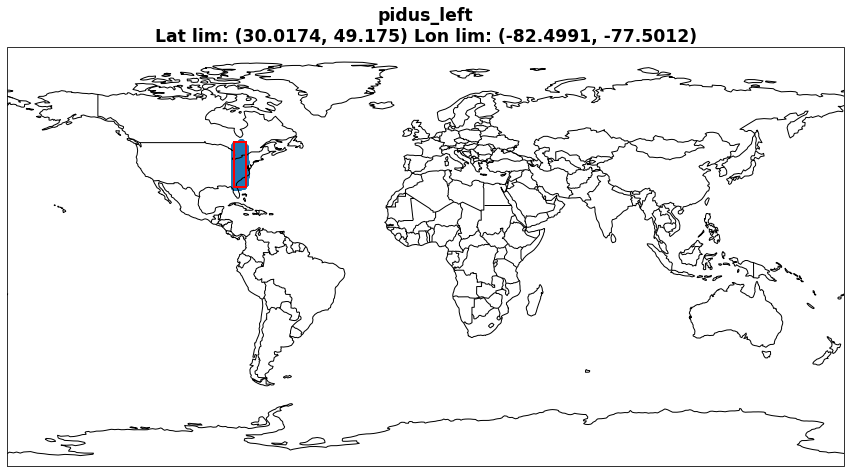

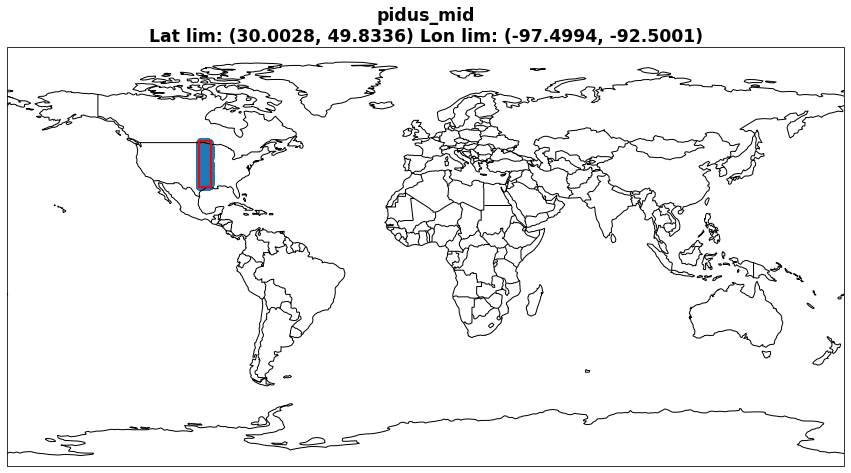

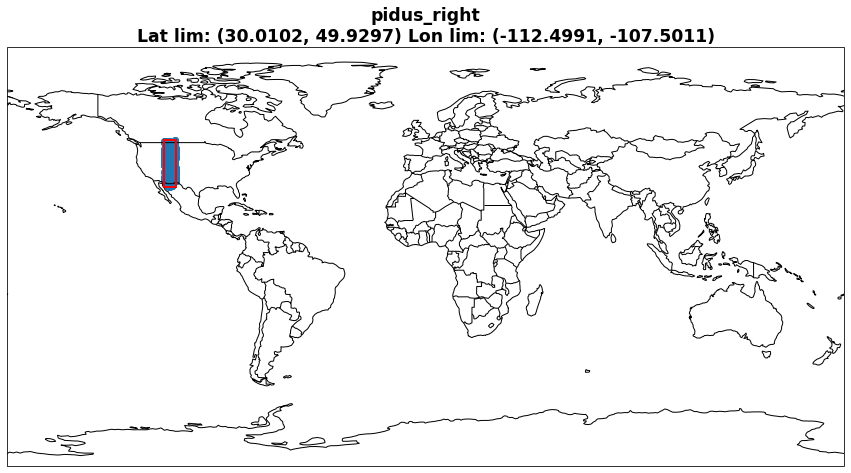

In [11]:
#key = 'pidx'
for key in keys:
    tecs = tecs_vals['tecs']
    idx  = tecs_vals[key]
    lats = tecs[idx,1]
    lons = tecs[idx,2]

    fig = plt.figure(figsize=(15,15))
    ax  = fig.add_subplot(111,projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.scatter(lons,lats)
    ax.set_xlim(-180,180)
    ax.set_ylim(-90,90)

    lat_0 = np.min(lats)
    lat_1 = np.max(lats)
    lon_0 = np.min(lons)
    lon_1 = np.max(lons)
    
    x0 = lon_0
    y0 = lat_0
    ww = lon_1 - x0
    hh = lat_1 - y0
    p  = mpl.patches.Rectangle((x0,y0),ww,hh,fill=False,zorder=50000,color='r',lw=2)
    ax.add_patch(p)
    
    lims = 'Lat lim: ({!s}, {!s}) Lon lim: ({!s}, {!s})'.format(lat_0,lat_1,lon_0,lon_1)
    ax.set_title(key+'\n'+lims)

    plt.show()


In [ ]:
tecs.shape